In [1]:
import pandas as pd
import numpy as np
import warnings
import datetime
import re
import emoji

warnings.filterwarnings("ignore")

In [2]:
tweets_df = pd.read_csv('snsusers_tweets.csv')

In [3]:
tweets_df.head()

,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,media,quotedTweet,mentionedUsers,lang
0,2021-05-29 00:53:33+00:00,@TETEPROTECT0R he’s jinjja uwu~~😞,1398442352868462596,1225094973948878853,1,0,1,0,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",Indonesian
1,2021-05-28 23:54:38+00:00,@J4MAlSVU_ @yeoyxy @vminkookurz yes coz even s...,1398427525844549633,1225094973948878853,5,2,2,11,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",English
2,2021-05-28 22:06:12+00:00,@jnkstigmaa chan outsold https://t.co/A5jMzyqVvZ,1398400240173076481,1225094973948878853,1,0,0,1,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",English
3,2021-05-28 22:03:53+00:00,@jnkstigmaa EXCUSE MEEEEE&amp;:):&amp;):£: i a...,1398399655533236232,1225094973948878853,1,0,0,0,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",English
4,2021-05-28 22:02:39+00:00,@jnkstigmaa gottem mad https://t.co/RncbakBowH,1398399345356165122,1225094973948878853,1,0,0,0,"[{'_type': 'snscrape.modules.twitter.Gif', 'th...",NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",English


In [4]:
tweets_df['date'] = pd.to_datetime(tweets_df['date'])

In [5]:
tweets_df['year'] = tweets_df['date'].dt.year
tweets_df['month'] = tweets_df['date'].dt.month

In [6]:
tweets_df['date'] = tweets_df['date'].dt.strftime('%Y-%m-%d')

In [7]:
tweets_df.head()

,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,media,quotedTweet,mentionedUsers,lang,year,month
0,2021-05-29,@TETEPROTECT0R he’s jinjja uwu~~😞,1398442352868462596,1225094973948878853,1,0,1,0,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",Indonesian,2021,5
1,2021-05-28,@J4MAlSVU_ @yeoyxy @vminkookurz yes coz even s...,1398427525844549633,1225094973948878853,5,2,2,11,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",English,2021,5
2,2021-05-28,@jnkstigmaa chan outsold https://t.co/A5jMzyqVvZ,1398400240173076481,1225094973948878853,1,0,0,1,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",English,2021,5
3,2021-05-28,@jnkstigmaa EXCUSE MEEEEE&amp;:):&amp;):£: i a...,1398399655533236232,1225094973948878853,1,0,0,0,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",English,2021,5
4,2021-05-28,@jnkstigmaa gottem mad https://t.co/RncbakBowH,1398399345356165122,1225094973948878853,1,0,0,0,"[{'_type': 'snscrape.modules.twitter.Gif', 'th...",NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",English,2021,5


In [8]:
tweets_df[['year','tweetId']].groupby('year').count()

,tweetId
year,
2017,52
2020,203
2021,6879


In [9]:
tweets_2021 = tweets_df[tweets_df.year == 2021]

In [10]:
tweets_2021.shape

(6879, 14)

In [11]:
tweets_2021[['month','tweetId']].groupby('month').count()

,tweetId
month,
1,83
2,90
3,761
4,3831
5,2114


In [12]:
def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

In [13]:
tweets_df['emoji'] = tweets_df.renderedContent.apply(extract_emojis)

In [14]:
tweets_df.dtypes

date               object
renderedContent    object
tweetId             int64
userId              int64
replyCount          int64
retweetCount        int64
likeCount           int64
quoteCount          int64
media              object
quotedTweet        object
mentionedUsers     object
lang               object
year                int64
month               int64
emoji              object
dtype: object

In [15]:
tweets_df['emoji'].iloc[20]

'🥺🥰'

In [16]:
tweets_df['emoji'].iloc[20][0].encode('unicode-escape').decode('ASCII')

'\\U0001f97a'

In [18]:
tweets_df['emoji'].iloc[20]

'🥺🥰'

In [19]:
a = list(tweets_df['emoji'].iloc[20])

In [20]:
for i in a:
    print(f'U000{ord(i):X}')

U0001F97A
U0001F970


In [21]:
import seaborn as sns

<AxesSubplot:xlabel='date', ylabel='tweetId'>

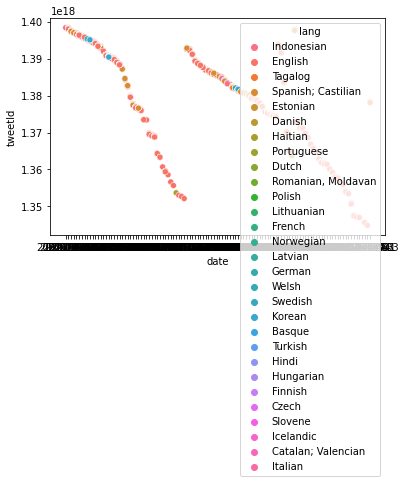

In [24]:
sns.scatterplot(data=tweets_2021, x="date", y="tweetId", hue="lang")